In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
batch_size = 1

In [3]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()), 
                                                       batch_size=batch_size, shuffle=True)

Processing...
Done!


In [4]:
for data, target in train_loader:
    print(data, target)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()), 
                                                       batch_size=batch_size, shuffle=True)

In [6]:
data.shape

torch.Size([1, 1, 28, 28])

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data.reshape(28,28))

In [8]:
x = data.reshape(28*28) #784

In [9]:
x.shape

torch.Size([784])

In [10]:
w = torch.randn(10, 784, requires_grad=True)
b = torch.randn(10, requires_grad=True)

In [11]:
w1 = w/10
b1 = b/10

In [12]:
b

tensor([-0.0096, -0.7213,  0.6355, -0.1941,  0.2741, -0.0485,  1.3123,  1.1149,
        -1.2899, -0.2618], requires_grad=True)

In [13]:
b1

tensor([-0.0010, -0.0721,  0.0636, -0.0194,  0.0274, -0.0048,  0.1312,  0.1115,
        -0.1290, -0.0262], grad_fn=<DivBackward0>)

In [14]:
o1_ = torch.mv(w1, x) + b1

In [15]:
o1_

tensor([ 0.1846,  0.5459, -0.4246,  0.9446,  0.0680, -1.2183,  1.0269,  0.1653,
        -1.4672, -1.4137], grad_fn=<ThAddBackward>)

In [16]:
a1_ = 1/(1+torch.exp(-o1_))

In [17]:
a1_

tensor([0.5460, 0.6332, 0.3954, 0.7200, 0.5170, 0.2282, 0.7363, 0.5412, 0.1874,
        0.1956], grad_fn=<MulBackward>)

In [18]:
a1_.argmax()

tensor(6)

In [19]:
target

tensor([3])

In [20]:
def oneHot(target):
    onehot = torch.zeros(10)
    onehot[target] = 1
    return onehot

In [21]:
y = oneHot(target)
y

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [22]:
BCE = torch.nn.BCELoss()
loss = BCE(a1_, y)

loss

tensor(0.6149, grad_fn=<BinaryCrossEntropyBackward>)

In [23]:
learning_rate = 0.0001
optimizer = torch.optim.Adam([w, b], lr=learning_rate)

optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)

In [24]:
# Learning Loop
for _ in range(10):
    tot_loss = 0
    for data, target in train_loader:
        x = data.reshape(784)
        y = oneHot(target)
        
        w1 = w/10
        b1 = b/10
        
        o1_ = torch.mv(w1, x) + b1
        a1_ = 1/(1 + torch.exp( -o1_ ))
        
        loss = BCE(a1_, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tot_loss += loss
    print(tot_loss/60000.)
        

tensor(0.2428, grad_fn=<DivBackward0>)
tensor(0.1392, grad_fn=<DivBackward0>)
tensor(0.1160, grad_fn=<DivBackward0>)
tensor(0.1048, grad_fn=<DivBackward0>)
tensor(0.0979, grad_fn=<DivBackward0>)
tensor(0.0932, grad_fn=<DivBackward0>)
tensor(0.0898, grad_fn=<DivBackward0>)
tensor(0.0872, grad_fn=<DivBackward0>)
tensor(0.0851, grad_fn=<DivBackward0>)
tensor(0.0834, grad_fn=<DivBackward0>)


In [25]:
cnt = 0
for data, target in test_loader:
    x = data.reshape(784)
    
    w1 = w/10
    b1 = b/10    
    
    o1_ = torch.mv(w1, x) + b1
    a1_ = 1/(1 + torch.exp( -o1_ ))
    y_ = a1_.argmax()
    
    if y_ == target:
        cnt += 1

In [26]:
cnt/10000

0.9035

In [27]:
tmp = w

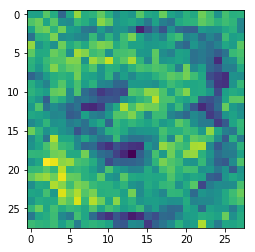

In [28]:
plt.imshow(w[3].detach().numpy().reshape(28,28))